In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json("cleaned_data_model.json")
df.head()

,Fiyat,Brüt M2,Bulunduğu Kat,Bina Yaşı,İlçe,Mahalle,Oda
0,5390000,85.0,-1.0,5,Maltepe,Altıntepe,2
1,5690000,65.0,3.0,4,Kartal,Orhantepe,1
2,1850000,112.0,2.0,0,Esenyurt,Çınar,3
3,895000,104.0,-1.0,5,Esenyurt,Yeşilkent,2
4,3250000,170.0,2.0,0,Beylikdüzü,Adnan Kahveci,3


#### - Which districts have the most apartments on sale?

The overrepresentation of Kadıköy can either be due to the recent high demand for Kadıköy or due to something I overlooked during scraping: a biased popularity filtering of the website. Also, these numbers should be interpreted compared to the area/inhibited area of the districts.

In [3]:
num_listings = df["İlçe"].value_counts()
num_listings

İlçe
Kadıköy          3123
Maltepe          1741
Esenyurt         1318
Küçükçekmece     1131
Şişli            1070
Beylikdüzü       1064
Kağıthane        1009
Bahçelievler      964
Beşiktaş          865
Üsküdar           861
Fatih             827
Sarıyer           808
Bakırköy          738
Avcılar           649
Eyüpsultan        581
Zeytinburnu       577
Beyoğlu           479
Kartal            474
Büyükçekmece      450
Ümraniye          424
Ataşehir          370
Pendik            358
Sultangazi        356
Çekmeköy          351
Bağcılar          350
Esenler           344
Gaziosmanpaşa     343
Sancaktepe        328
Güngören          310
Başakşehir        304
Bayrampaşa        210
Silivri           188
Arnavutköy        181
Adalar            180
Sultanbeyli       152
Tuzla             140
Beykoz            109
Şile               39
Çatalca             4
Name: count, dtype: int64

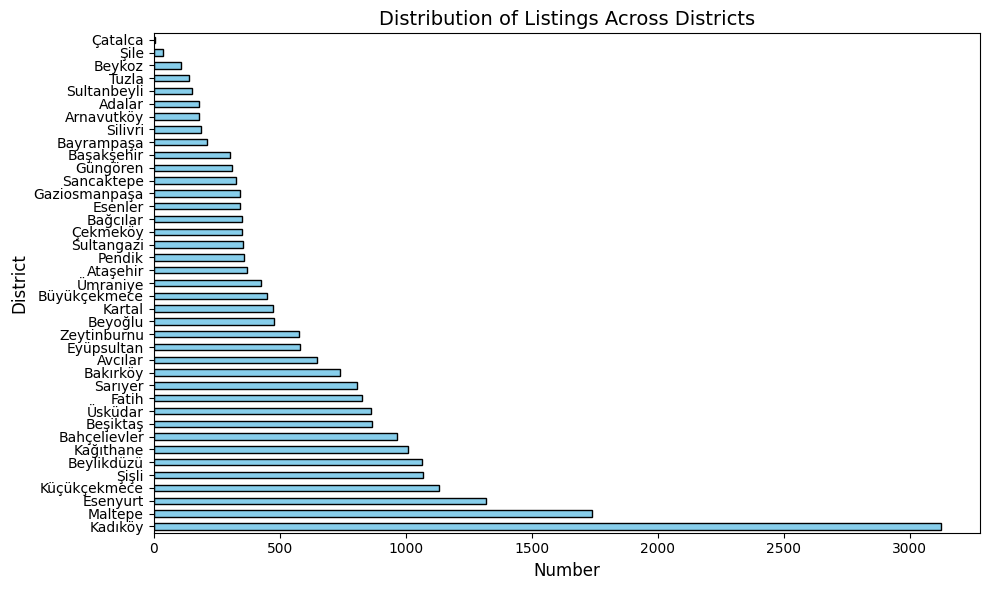

In [4]:
plt.figure(figsize=(10, 6))
num_listings.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title("Distribution of Listings Across Districts", fontsize=14)
plt.xlabel("Number", fontsize=12)
plt.ylabel("District", fontsize=12)
plt.tight_layout()

#### - Which district has the most expensive/cheapest apartments?
An overall pattern for this graph is that the median is always smaller than the mean, which points to the skewedness of the prices in İstanbul. Due to high priced outliers, especially found in expensive districts, the means increase considerably.

In [5]:
mean_median = df.groupby('İlçe')["Fiyat"].agg(['mean', 'median', 'std'])
mean_median = mean_median.sort_values(by=['mean','median'])
mean_median = mean_median.round(2)

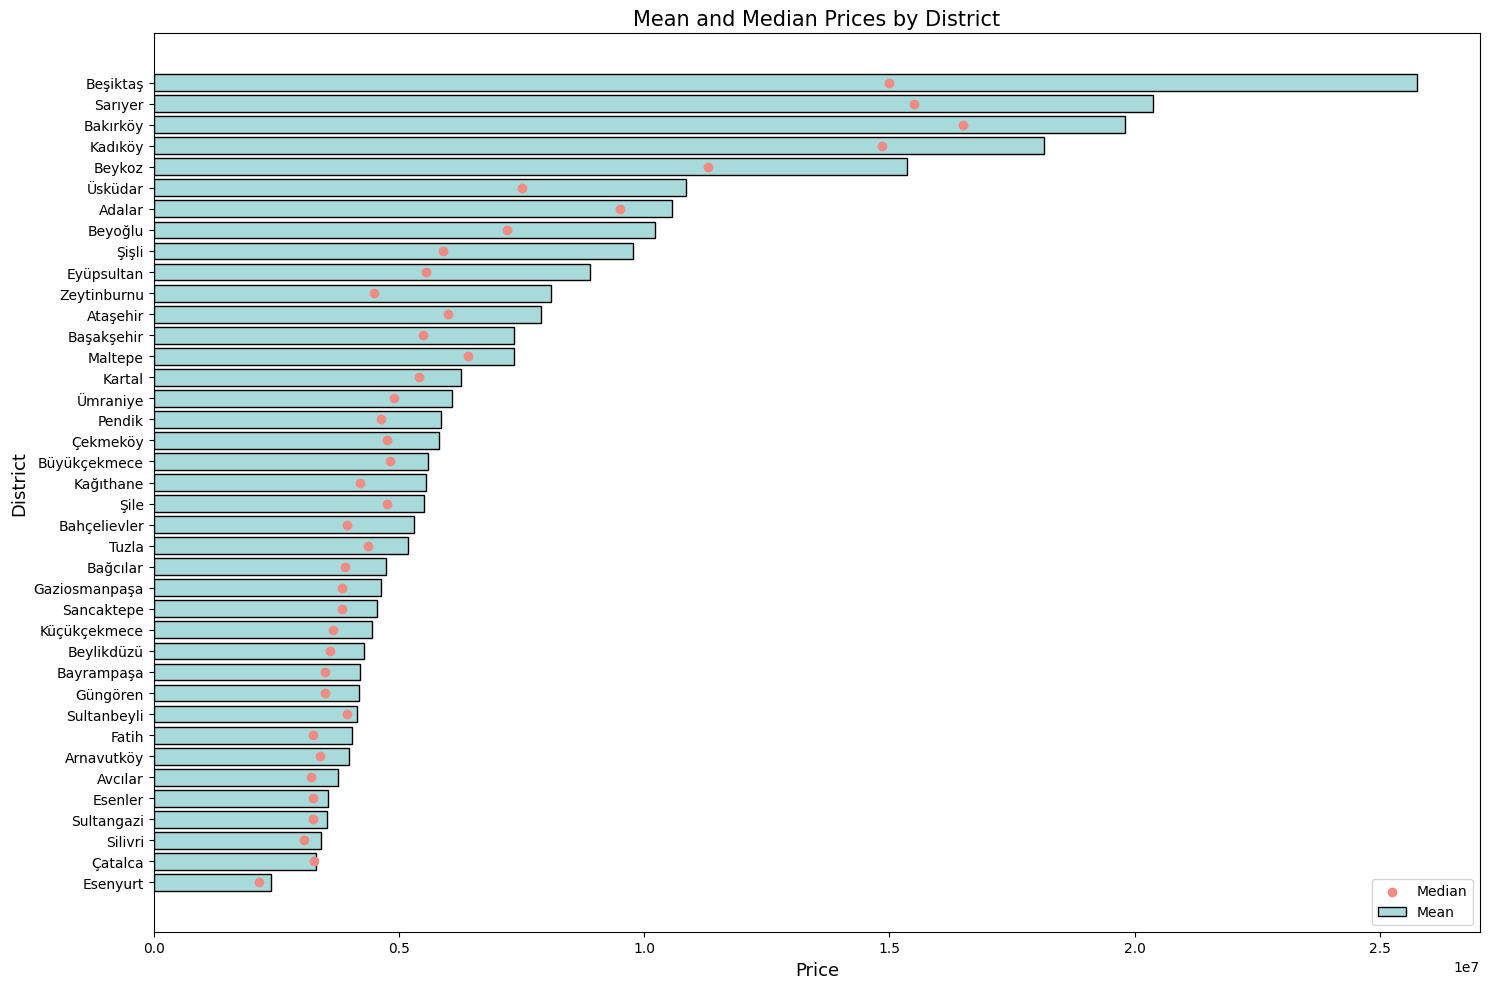

In [6]:
districts = mean_median.index
mean_values = mean_median['mean']
median_values = mean_median['median']

plt.figure(figsize=(15, 10))

plt.barh(districts, mean_values, color="#A8DADC", edgecolor='black', label='Mean')

plt.scatter(median_values, range(len(districts)), color='#F28B82', label='Median', zorder=3)

plt.title("Mean and Median Prices by District", fontsize=15)
plt.xlabel("Price", fontsize=13)
plt.ylabel("District", fontsize=13)

plt.legend(loc='lower right')

plt.tight_layout()

plt.show()

#### -What is the standard deviation in prices grouped by districts?
The standard deviation plot points to the same fact, with some outliers prices ranging much higher than the majority of the data. This is especially pronounced in Beşiktaş. Zeytinburnu and Şişli seems to have some outlier apartments which are cheaper than the majority of the data. 

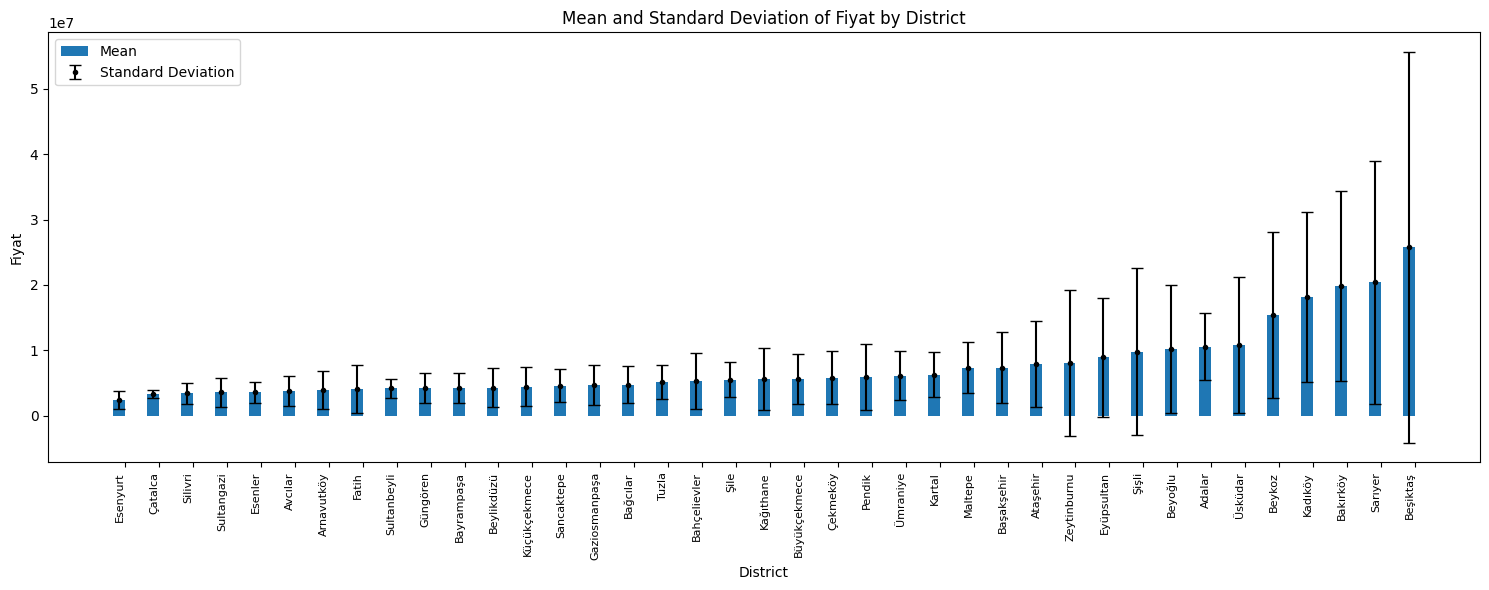

In [7]:
fig, ax = plt.subplots(figsize=(15, 6))

bar_width = 0.35
x_indices = np.arange(len(mean_median))

ax.bar(x_indices - bar_width/2, mean_median['mean'], bar_width, label='Mean')
ax.errorbar(x_indices - bar_width/2, mean_median['mean'], yerr=mean_median['std'], fmt='.k', capsize=4, label='Standard Deviation')  # Error bars for standard deviation

ax.set_xlabel('District')
ax.set_ylabel('Fiyat')
ax.set_title('Mean and Standard Deviation of Fiyat by District')
ax.set_xticks(x_indices)
ax.set_xticklabels(mean_median.index, rotation=90, ha='right')
ax.tick_params(axis='x', labelsize=8) # optional smaller labels
ax.legend()
plt.tight_layout()
plt.show()


#### - Which district has the oldest/newest housing stock for sale?
These stats could be an indicator as to newly formed residential areas, as well as district which are under a fast urban transformation. 

In [8]:
age_stats = df.groupby('İlçe')["Bina Yaşı"].agg(['mean', 'median', 'std'])
age_stats = age_stats.sort_values(by=['mean', 'median'])
age_stats

,mean,median,std
İlçe,,,
Sultanbeyli,3.125000,1.0,5.605476
Arnavutköy,3.569061,0.0,5.528907
Beylikdüzü,5.187970,3.0,7.171886
Sancaktepe,5.396341,5.0,5.877567
Esenyurt,5.678300,5.0,4.854105
Çekmeköy,6.051282,5.0,6.182250
Tuzla,6.850000,5.0,8.137245
Maltepe,7.577829,4.0,10.488765
Başakşehir,7.651316,5.0,6.688505


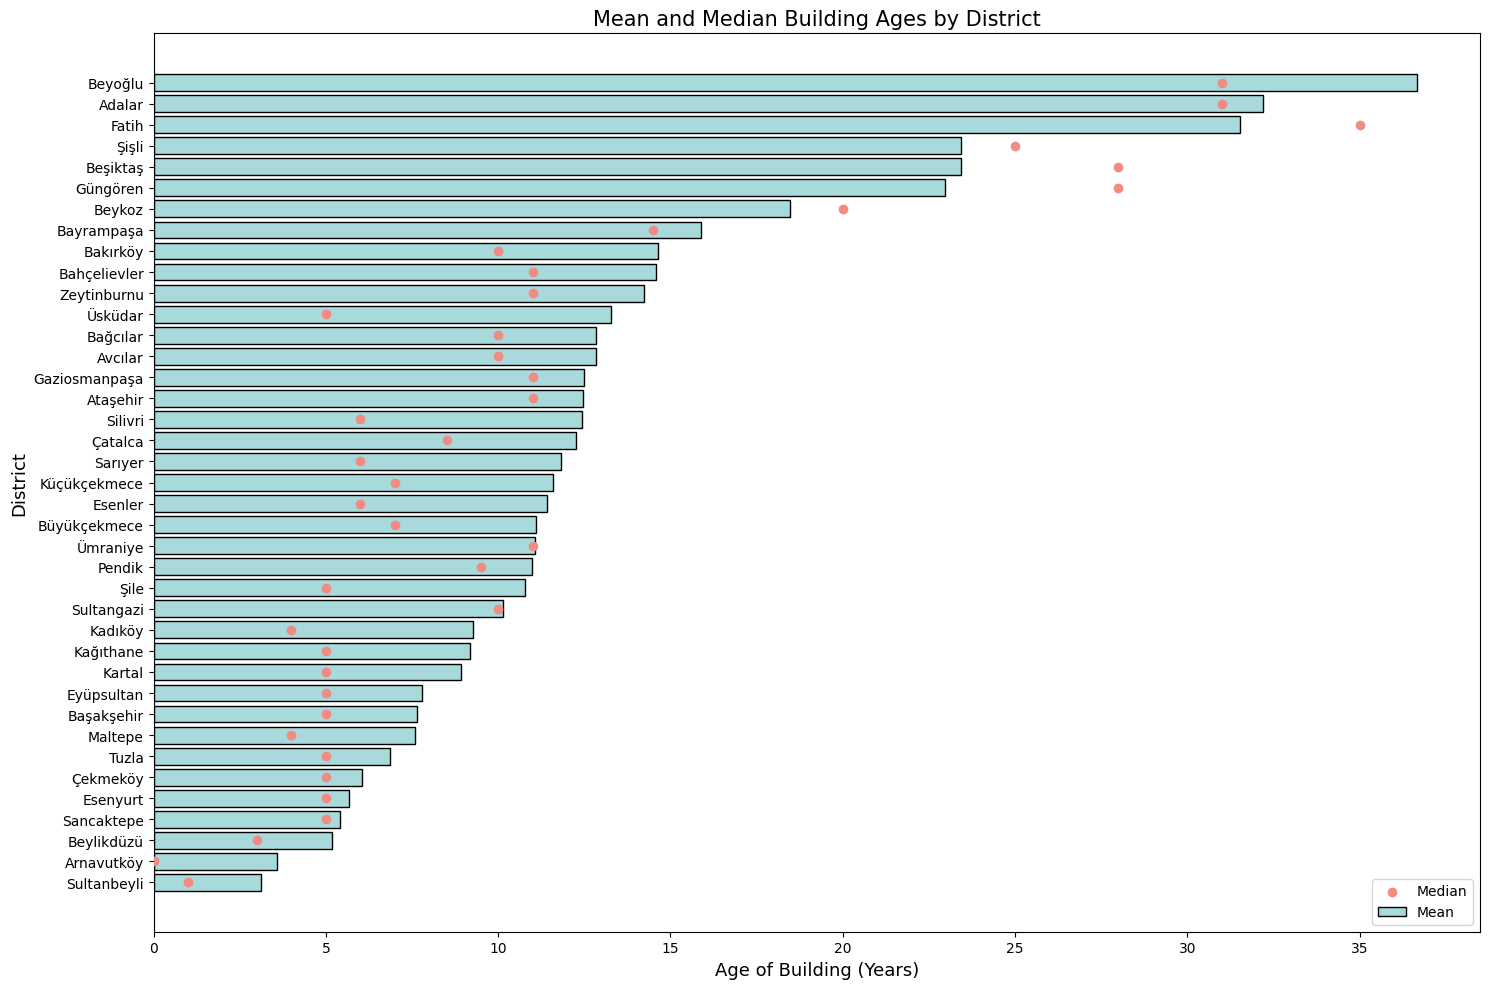

In [9]:
districts = age_stats.index
mean_ages = age_stats['mean']
median_ages = age_stats['median']

plt.figure(figsize=(15, 10))

plt.barh(districts, mean_ages, color="#A8DADC", edgecolor='black', label='Mean')

plt.scatter(median_ages, range(len(districts)), color='#F28B82', label='Median', zorder=3)

plt.title("Mean and Median Building Ages by District", fontsize=15)
plt.xlabel("Age of Building (Years)", fontsize=13)
plt.ylabel("District", fontsize=13)

plt.legend(loc='lower right')

plt.tight_layout()

plt.show()

#### - Which district has the largest/smallest apartments?

In [10]:
size_stats = df.groupby('İlçe')["Brüt M2"].agg(['mean', 'median', 'std'])
size_stats = size_stats.sort_values(by=['mean', 'median'])
size_stats

,mean,median,std
İlçe,,,
Esenler,102.799419,100.0,22.770061
Fatih,103.192261,90.0,39.881945
Kağıthane,103.448959,90.0,38.435263
Çatalca,111.500000,110.0,30.171731
Beyoğlu,111.695198,95.0,52.516415
Sultangazi,114.426966,100.0,33.813119
Bayrampaşa,114.471429,100.0,46.137320
Esenyurt,114.516692,110.0,33.734876
Şile,115.512821,94.0,53.747887


- Is there a relationship between the age of a building and apartment sizes?

In [11]:
df = df[df['Bina Yaşı'] <= 80]
correlation = df['Bina Yaşı'].corr(df['Brüt M2'])
print(f"Correlation between Age and Size: {correlation:.2f}")

Correlation between Age and Size: -0.05


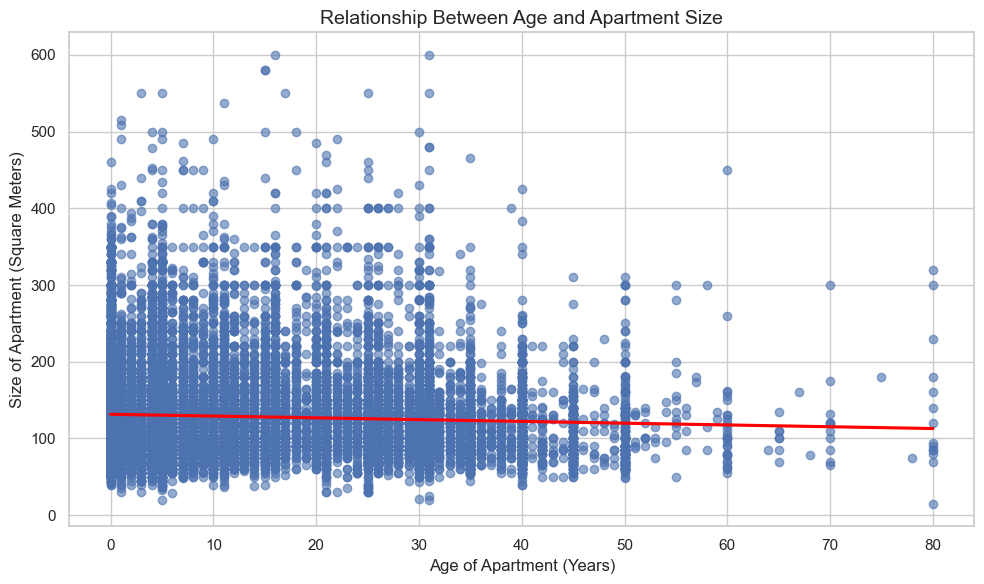

In [12]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.regplot(
    x='Bina Yaşı', y='Brüt M2', data=df, 
    scatter_kws={'alpha': 0.6},  
    line_kws={'color': 'red'},   
    ci=None                     
)

plt.title("Relationship Between Age and Apartment Size", fontsize=14)
plt.xlabel("Age of Apartment (Years)", fontsize=12)
plt.ylabel("Size of Apartment (Square Meters)", fontsize=12)
plt.tight_layout()

plt.show()


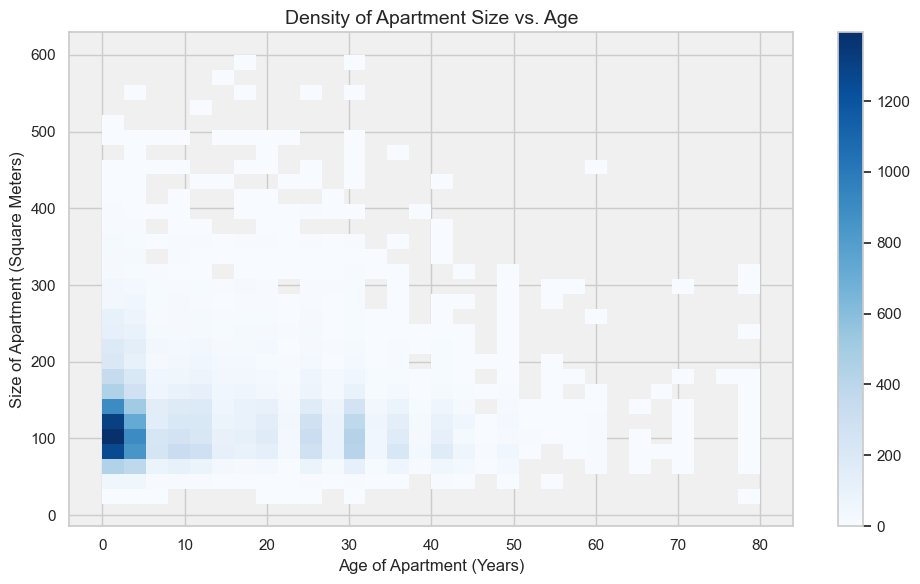

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df, x='Bina Yaşı', y='Brüt M2', bins=30, cbar=True, cmap='Blues'
)
ax = plt.gca()  # Get current axes
ax.set_facecolor('#f0f0f0')  # Set the axes background to coral red

# Add titles and labels
plt.title("Density of Apartment Size vs. Age", fontsize=14)
plt.xlabel("Age of Apartment (Years)", fontsize=12)
plt.ylabel("Size of Apartment (Square Meters)", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


#### - How does building age affect pricing?
In the regression plot for this relation, we observe a decrease in price as the building age goes up.

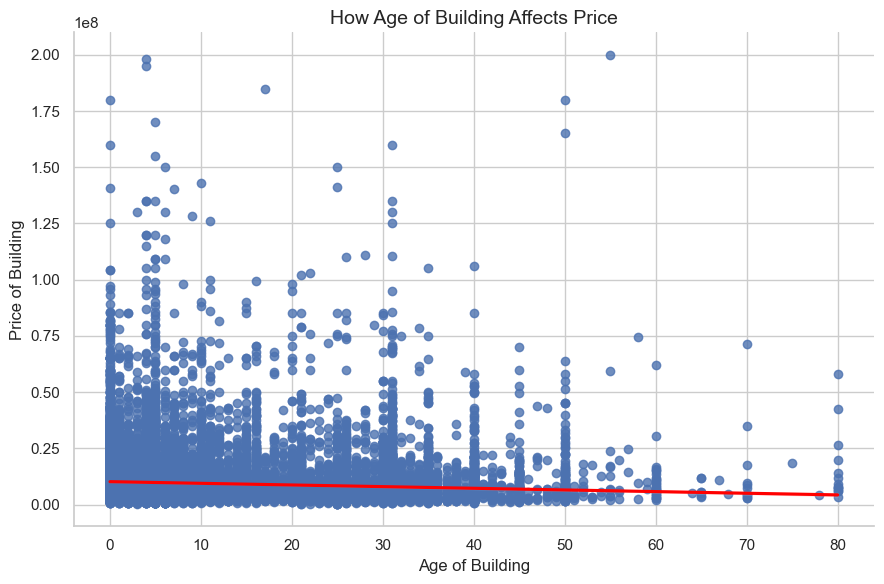

In [14]:
# Plotting with lmplot for detailed regression analysis
sns.lmplot(x='Bina Yaşı', y='Fiyat', data=df, aspect=1.5, height=6, line_kws={'color': 'red'})

plt.title("How Age of Building Affects Price", fontsize=14)
plt.xlabel("Age of Building", fontsize=12)
plt.ylabel("Price of Building", fontsize=12)

plt.tight_layout()
plt.show()


#### Correlation matrix for numerical data types
Square meters and number of rooms seem to have significant correlations with the price. Also square meters and number of rooms seem to be correlated. I could have engineered a separate feature for these two but I used them as two separate features. 

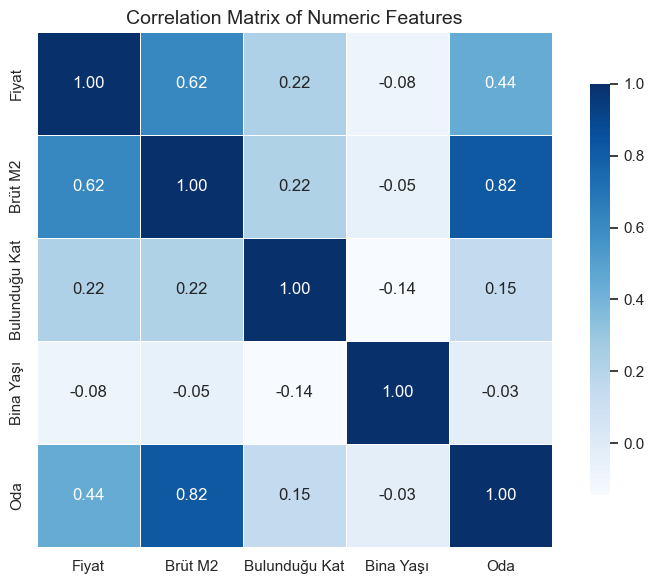

In [15]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', 
            linewidths=0.5, cbar_kws={"shrink": 0.8}, square=True)

plt.title("Correlation Matrix of Numeric Features", fontsize=14)
plt.tight_layout()

plt.show()